In [1]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
path = 'emotions-dataset-for-nlp'
files = os.listdir(path)
for f in files:
    print(f)

hypertuningNLP
test.txt
train.txt
val.txt


In [23]:
test_data = pd.read_csv(path+"/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv(path+"/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
validation_data = pd.read_csv(path+"/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [24]:
frames = [test_data, train_data, validation_data]

df = pd.concat(frames)

In [25]:
df.shape

(20000, 2)

In [26]:
df.head()

,Comment,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [27]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Training Data  DESCRIPTION
--------------------------
Training Data  shape: (20000, 2) 

Training Data  contains: 0  null values

Label counts:
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

***** Training Data  label count plot ****


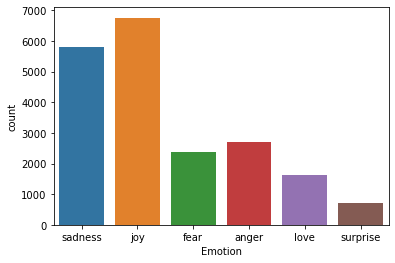

In [28]:
describe_data("Training Data",df,"Emotion")

In [31]:
df.reset_index(inplace=True)

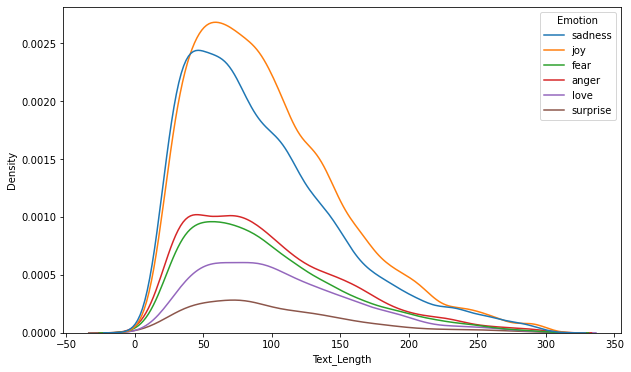

In [32]:
df["Text_Length"]=df["Comment"].apply(len)

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df["Text_Length"],
    hue=df["Emotion"]
)
plt.show()

In [33]:
df.head()

,index,Comment,Emotion,Text_Length
0,0,im feeling rather rotten so im not very ambiti...,sadness,59
1,1,im updating my blog because i feel shitty,sadness,41
2,2,i never make her separate from me because i do...,sadness,97
3,3,i left with my bouquet of red and yellow tulip...,joy,113
4,4,i was feeling a little vain when i did this one,sadness,47


In [40]:
new=["Comment","Emotion"]
newdata=df[new]

In [41]:
newdata['Emotion'] = newdata['Emotion'].astype('category')
newdata["Id"] = newdata['Emotion'].cat.codes

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
newdata.head()

,Comment,Emotion,Id
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,4
2,i never make her separate from me because i do...,sadness,4
3,i left with my bouquet of red and yellow tulip...,joy,2
4,i was feeling a little vain when i did this one,sadness,4


In [43]:
newdata.shape

(20000, 3)

In [44]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [45]:
lemmatizer = WordNetLemmatizer() 
tokenizer = RegexpTokenizer(r'\w+')

In [46]:
def sentence_clean(sentence):
    word_list = tokenizer.tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(newdata['Comment']).toarray()
labels = newdata["Id"]
features.shape

(20000, 5714)

In [48]:
count_vect = CountVectorizer()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(newdata['Comment'], newdata['Emotion'],test_size=0.3,random_state=2)

In [50]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [53]:
reg = LogisticRegression(max_iter=500,multi_class="auto",penalty='l2')
reg.fit(X_train_tfidf, y_train)
acc_log_train = round(reg.score(X_train_tfidf, y_train) * 100, 2)
acc_log_test = round(reg.score(count_vect.transform(X_test), y_test) * 100, 2)

In [54]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train_tfidf, y_train)
acc_random_forest = round(random_forest.score(X_train_tfidf, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(count_vect.transform(X_test), y_test) * 100, 2)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_tfidf, y_train) 
acc_decision_tree = round(decision_tree.score(X_train_tfidf, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(count_vect.transform(X_test), y_test) * 100, 2)

In [57]:
test=KNeighborsClassifier(n_neighbors=500)
test.fit(X_train_tfidf, y_train) 
acc_Kneighbour=test.score(X_train_tfidf, y_train) * 100
acc_Kneighbour_test=test.score(count_vect.transform(X_test), y_test) * 100

In [58]:
linear_svc = LinearSVC( penalty='l1',dual=False,tol=1e-5)
linear_svc.fit(X_train_tfidf, y_train) 
acc_linear_svc = round(linear_svc.score(X_train_tfidf, y_train) * 100)
acc_linear_svc_test = round(linear_svc.score(count_vect.transform(X_test), y_test) * 100)

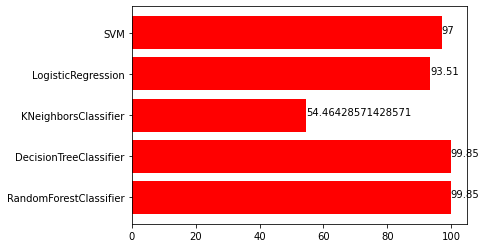

In [59]:
import matplotlib.pyplot as plt
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest,acc_decision_tree,acc_Kneighbour,acc_log_train,acc_linear_svc]
plt.barh(Model,Accuracy,color="r")
for index, value in enumerate(Accuracy):
    plt.text(value, index, str(value))

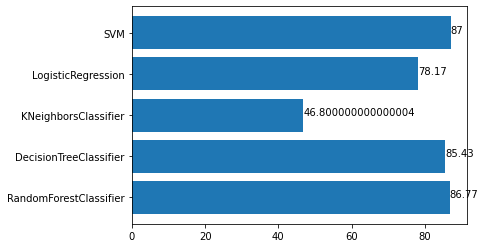

In [60]:
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest_test,acc_decision_tree_test,acc_Kneighbour_test,acc_log_test,acc_linear_svc_test]
plt.barh(Model,Accuracy)
for index, value in enumerate(Accuracy):
    plt.text(value, index, str(value))

In [65]:
total_scores = []
def accuracy_report(y_test,y_pred):
    i = 0
    for feat in y_test:
        print("Feature {}: {}".format(i+1,feat))
        print(classification_report(y_test[feat],y_pred[:,i]))
        accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
        total_scores.append(accuracy)
        i+=1
    print("Total Accuracy : {:.4f}".format(np.mean(total_scores)))

In [67]:
y_pred = random_forest.predict(count_vect.transform(X_test))

In [68]:
y_pred

array(['anger', 'love', 'joy', ..., 'anger', 'love', 'joy'], dtype=object)

In [71]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.84      0.86       827
        fear       0.85      0.82      0.84       714
         joy       0.86      0.92      0.89      2024
        love       0.86      0.69      0.76       459
     sadness       0.87      0.92      0.90      1750
    surprise       0.83      0.62      0.71       226

    accuracy                           0.87      6000
   macro avg       0.86      0.80      0.83      6000
weighted avg       0.87      0.87      0.87      6000



In [72]:
results = confusion_matrix(y_test, y_pred)
print(results)

[[ 693   13   48    2   71    0]
 [  24  584   29    5   58   14]
 [  16   15 1860   43   79   11]
 [   2    3  128  316   10    0]
 [  41   21   69    2 1614    3]
 [   0   48   25    0   14  139]]


In [81]:
newdata

,Comment,Emotion,Id
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,4
2,i never make her separate from me because i do...,sadness,4
3,i left with my bouquet of red and yellow tulip...,joy,2
4,i was feeling a little vain when i did this one,sadness,4
...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,4
19996,i constantly worry about their fight against n...,joy,2
19997,i feel its important to share this info for th...,joy,2
19998,i truly feel that if you are passionate enough...,joy,2


In [84]:
category_id_df = newdata[['Emotion', 'Id']].drop_duplicates().sort_values('Id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Id', 'Emotion']].values)

In [85]:
category_id_df

,Emotion,Id
6,anger,0
5,fear,1
3,joy,2
14,love,3
0,sadness,4
65,surprise,5


In [86]:
category_to_id

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}

In [87]:
id_to_category

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

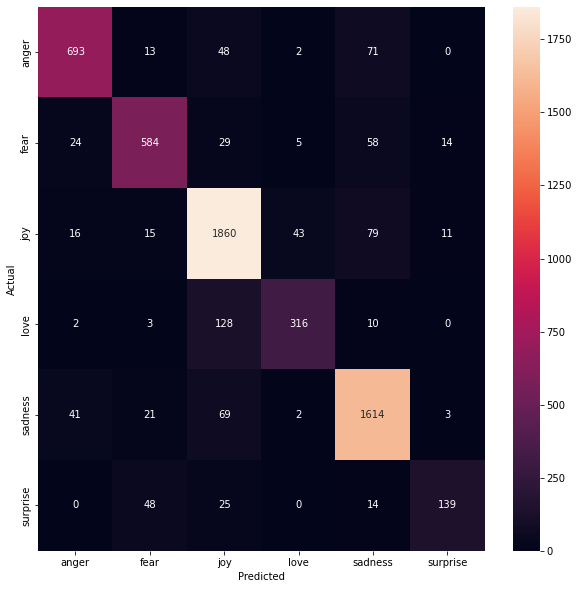

In [89]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Emotion.values, yticklabels=category_id_df.Emotion.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()